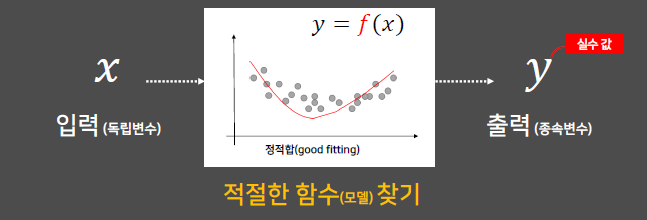

In [1]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# random seed 고정
random.seed(42)
np.random.seed(42)

In [3]:
# 데이터 입력
dt = pd.read_csv('./Agrofood_co2_emission.csv')
dt.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
# 데이터 타입 확인
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
# NA 값 확인
dt.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
# NA 값이 매우 많은 컬럼 삭제
dt = dt.drop(columns=['Crop Residues', 'Forestland', 'Net Forest conversion', 
                     'Food Household Consumption', 'IPPU', 'Manure applied to Soils',
                     'Manure Management', 'Fires in humid tropical forests', 
                     'On-farm energy use'])

# NA 값 확인
dt.isna().sum()

Area                                0
Year                                0
Savanna fires                      31
Forest fires                       93
Rice Cultivation                    0
Drained organic soils (CO2)         0
Pesticides Manufacturing            0
Food Transport                      0
Food Retail                         0
On-farm Electricity Use             0
Food Packaging                      0
Agrifood Systems Waste Disposal     0
Food Processing                     0
Fertilizers Manufacturing           0
Manure left on Pasture              0
Fires in organic soils              0
Rural population                    0
Urban population                    0
Total Population - Male             0
Total Population - Female           0
total_emission                      0
Average Temperature °C              0
dtype: int64

In [7]:
# 나머지 컬럼 중 NA 값이 포함된 행 삭제
dt = dt.dropna()
dt.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
Manure left on Pasture             0
Fires in organic soils             0
Rural population                   0
Urban population                   0
Total Population - Male            0
Total Population - Female          0
total_emission                     0
Average Temperature °C             0
dtype: int64

In [8]:
# 범주형 변수 확인
dt['Area'].value_counts()

Afghanistan                        31
Niger                              31
Morocco                            31
Mozambique                         31
Myanmar                            31
                                   ..
Czechoslovakia                      3
Ethiopia PDR                        3
USSR                                2
Yugoslav SFR                        2
Pacific Islands Trust Territory     1
Name: Area, Length: 233, dtype: int64

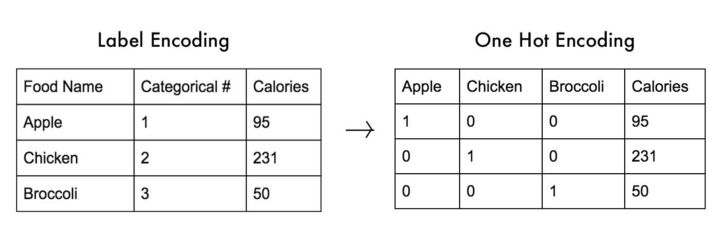

In [9]:
# 범주형 변수 처리: Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dt['Area'] = le.fit_transform(dt['Area'])
dt['Area']

0         0
1         0
2         0
3         0
4         0
       ... 
6960    232
6961    232
6962    232
6963    232
6964    232
Name: Area, Length: 6872, dtype: int32

In [10]:
# Label encoding의 mapping 정보 출력
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("레이블 매핑:")
for k, v in mapping.items():
    print(f"    {k} → {v}")

레이블 매핑:
    Afghanistan → 0
    Albania → 1
    Algeria → 2
    American Samoa → 3
    Andorra → 4
    Angola → 5
    Anguilla → 6
    Antigua and Barbuda → 7
    Argentina → 8
    Armenia → 9
    Aruba → 10
    Australia → 11
    Austria → 12
    Azerbaijan → 13
    Bahamas → 14
    Bahrain → 15
    Bangladesh → 16
    Barbados → 17
    Belarus → 18
    Belgium → 19
    Belgium-Luxembourg → 20
    Belize → 21
    Benin → 22
    Bermuda → 23
    Bhutan → 24
    Bolivia (Plurinational State of) → 25
    Bosnia and Herzegovina → 26
    Botswana → 27
    Brazil → 28
    British Virgin Islands → 29
    Brunei Darussalam → 30
    Bulgaria → 31
    Burkina Faso → 32
    Burundi → 33
    Cabo Verde → 34
    Cambodia → 35
    Cameroon → 36
    Canada → 37
    Cayman Islands → 38
    Central African Republic → 39
    Chad → 40
    Channel Islands → 41
    Chile → 42
    China → 43
    China, Hong Kong SAR → 44
    China, Macao SAR → 45
    China, Taiwan Province of → 46
    China, mainland → 47

In [11]:
# X/Y 분할
X = dt.iloc[:, :-1];  y = dt.iloc[:, -1]

# 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4810, 21) (4810,) (2062, 21) (2062,)


## Option 1. Scikit-learn package 활용

In [12]:
# MLPRegressor 모델 생성
model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, activation='relu', solver='adam', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

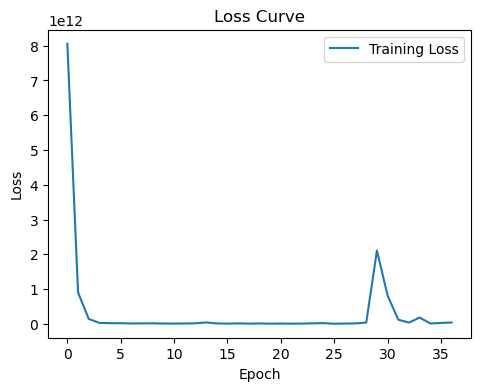

In [13]:
# 손실 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.loss_curve_, label='Training Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(); plt.show()

In [14]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([-4.29356179e+05,  5.77594227e+03, -4.94023377e+04, ...,
        1.40548783e+01, -1.54621247e+06, -2.40630079e+04])

In [15]:
# 성능 평가 (MSE)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

MSE: 100079843345.37122
MAE: 70965.13201924454
R2 : -323035878584.2416


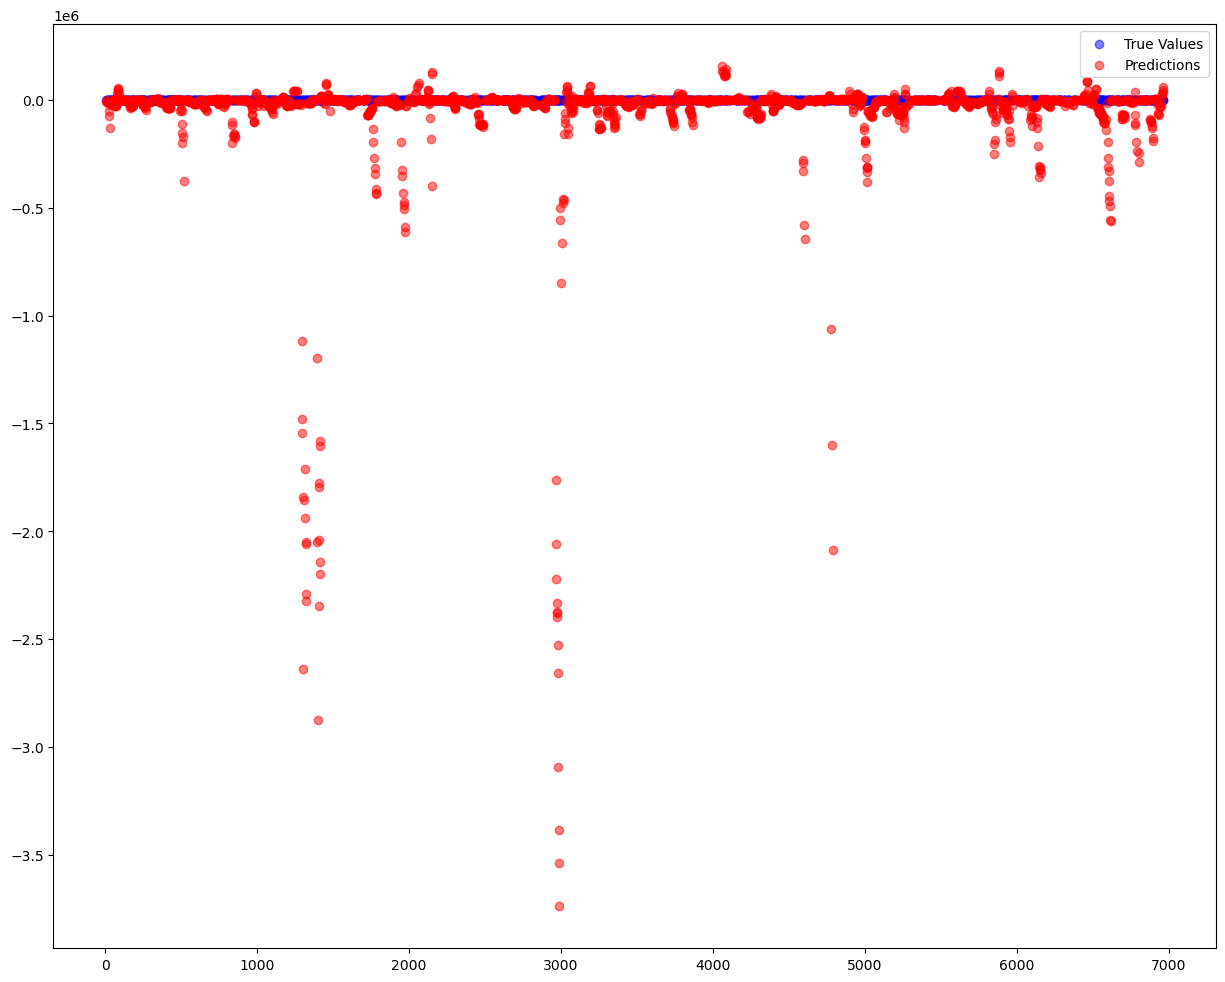

In [16]:
# 결과 시각화
plt.figure(figsize = (15, 12))
plt.scatter(y_test.index, y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(y_test.index, y_pred, color='red', label='Predictions', alpha=0.5)
# plt.ylim(-10, 5)
plt.legend()
plt.show()

## Option 2. PyTorch framework 활용

In [17]:
# 필요한 패키지 불러오기
import torch
import torch.nn as nn
import torch.optim as optim

# random seed 고정
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)  # multi-GPU 사용 시
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [18]:
# Tensor로 변환
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [19]:
# MLP 모델 정의
class MLPRegressor(nn.Module):
    def __init__(self):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(21, 128)  # 입력 크기 1, 출력 크기 64
        self.fc2 = nn.Linear(128, 64) # 입력 크기 64, 출력 크기 64
        self.fc3 = nn.Linear(64, 1)  # 입력 크기 64, 출력 크기 1 (회귀용)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 활성화 함수
        x = torch.relu(self.fc2(x))  # ReLU 활성화 함수
        x = self.fc3(x)  # 최종 출력
        return x

model = MLPRegressor().to(device)

In [20]:
# 손실함수 및 최적화 함수 정의
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
# MLP 모델 학습
num_epochs = 3000
losses = []

for epoch in range(num_epochs):
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    loss = criterion(outputs, y_train_tensor.to(device))
    
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


C:\Users\ysbye\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([4810])) that is different to the input size (torch.Size([4810, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/3000], Loss: 23653113856.0000
Epoch [100/3000], Loss: 384579744.0000
Epoch [150/3000], Loss: 271343456.0000
Epoch [200/3000], Loss: 180625760.0000
Epoch [250/3000], Loss: 131593648.0000
Epoch [300/3000], Loss: 125875296.0000
Epoch [350/3000], Loss: 82815360.0000
Epoch [400/3000], Loss: 67196368.0000
Epoch [450/3000], Loss: 58076944.0000
Epoch [500/3000], Loss: 51810768.0000
Epoch [550/3000], Loss: 45579712.0000
Epoch [600/3000], Loss: 40773592.0000
Epoch [650/3000], Loss: 36599516.0000
Epoch [700/3000], Loss: 32924910.0000
Epoch [750/3000], Loss: 29759602.0000
Epoch [800/3000], Loss: 27555916.0000
Epoch [850/3000], Loss: 25194298.0000
Epoch [900/3000], Loss: 23901366.0000
Epoch [950/3000], Loss: 21003360.0000
Epoch [1000/3000], Loss: 19080636.0000
Epoch [1050/3000], Loss: 17723424.0000
Epoch [1100/3000], Loss: 16401661.0000
Epoch [1150/3000], Loss: 15556659.0000
Epoch [1200/3000], Loss: 14629076.0000
Epoch [1250/3000], Loss: 13772898.0000
Epoch [1300/3000], Loss: 12997245.000

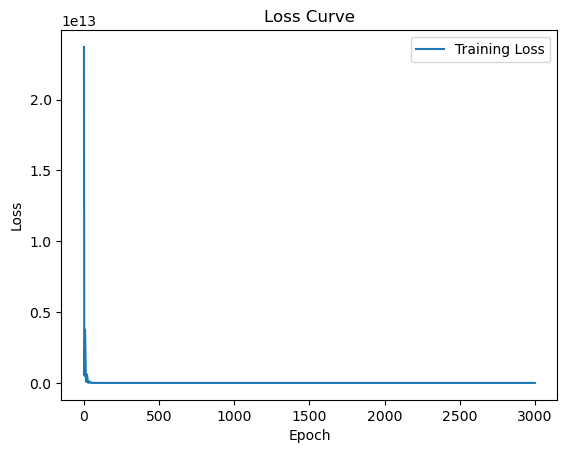

In [22]:
# 손실 시각화
plt.plot(losses, label='Training Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(); plt.show()

In [23]:
# 모델 평가
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor.to(device))

In [24]:
# 성능 평가 지표: MSE
y_pred = y_pred_tensor.cpu().numpy()  # 예측값을 CPU로 가져오기

mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

Mean Squared Error: 7841569.868990464
MAE: 989.1685798583587
R2 : -25311106.419544894


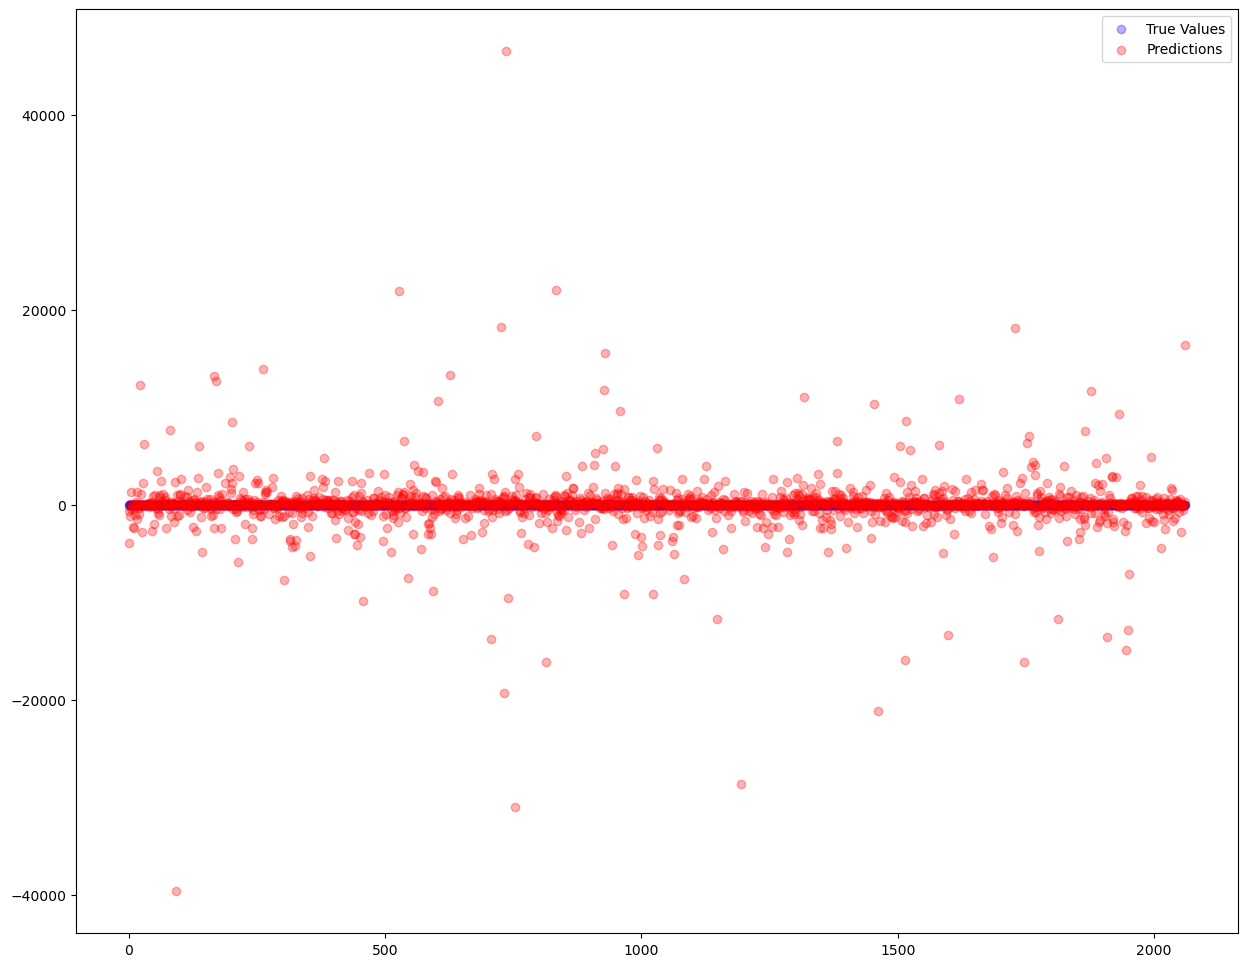

In [26]:
# 결과 시각화
plt.figure(figsize = (15, 12))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.3)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predictions', alpha=0.3)
# plt.ylim(-500, 500)
plt.legend()
plt.show()